In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

"""

The main purpose is meant for clean to make presentable data and create
a new csv file from the provided one called "Stats_Analysis".

Creates Two New CSV Files called Stats_Analysis_Update.csv for scatter 
plot and second one is called Stats_Analysis_V2.csv meant for a pie chart 
which contains all the data from the Stats_Analysis.

"""

game_statistics = pd.read_csv('ProjectFiles/Stats_Analysis.csv')
pd.set_option('display.max_rows', None)


# Converting the Average Rating to the Nearest Tenth
game_statistics.loc[:, "Avg. Star Rating"] = game_statistics['Average Star Rating'].map('{:,.2f}'.format) 
# Converting the Completed Percentage to the Nearest Tenth
game_statistics.loc[:, "Completed Status"] = game_statistics['Completed Percentage'].map('{:,.2f}'.format)  + '%'
# Converting the Shelved Percentage to the Nearest Tenth
game_statistics.loc[:, "Shelved Status"] = game_statistics["Shelved Percentage"].map('{:,.2f}'.format) + '%'
# Converting the Abandoned Percentage to the Nearest Tenth
game_statistics.loc[:, "Abandoned Status"] = game_statistics["Abandoned Percentage"].map('{:,.2f}'.format) + '%'

# Dropping All Old Rows in the File
game_statistics.drop(columns = ['Average Star Rating'], axis =1, inplace = True)
game_statistics.drop(columns = ['Completed Percentage'], axis =1, inplace = True)
game_statistics.drop(columns = ['Shelved Percentage'], axis =1, inplace = True)
game_statistics.drop(columns = ['Abandoned Percentage'], axis =1, inplace = True)

# Sorting Values by the Game_ID
game_statistics = game_statistics.sort_values(by="Game_ID")

# Dropping Values that contain a 0.00% at any point to make it easier to read.
game_statistics = game_statistics[(game_statistics["Shelved Status"] != '0.00%') & (game_statistics["Abandoned Status"] != '0.00%') & 
                                  (game_statistics["Completed Status"] != '0.00%')]

# Creates a Brand New CSV File
game_statistics.to_csv('ProjectFiles/Stats_Analysis_Update.csv', index=False)



In [206]:
game_statistics

,Game_ID,Game Title,Avg. Star Rating,Completed Status,Shelved Status,Abandoned Status
48,49,Red Dead Redemption 2,3.67,83.33%,5.56%,11.11%
90,91,Borderlands 2,3.91,72.73%,9.09%,18.18%
151,152,Sea of Thieves,2.75,25.00%,50.00%,25.00%
157,158,Yakuza 0,4.11,83.33%,5.56%,5.56%
195,196,Cuphead,3.09,72.73%,9.09%,9.09%
197,198,Assassin's Creed IV Black Flag,4.00,66.67%,16.67%,16.67%
201,202,Hogwarts Legacy,2.55,54.55%,18.18%,27.27%
226,227,Borderlands: The Pre-Sequel,2.25,25.00%,25.00%,50.00%
274,275,Yooka-Laylee,2.00,25.00%,25.00%,25.00%
290,291,Max Payne 3,2.50,75.00%,12.50%,12.50%


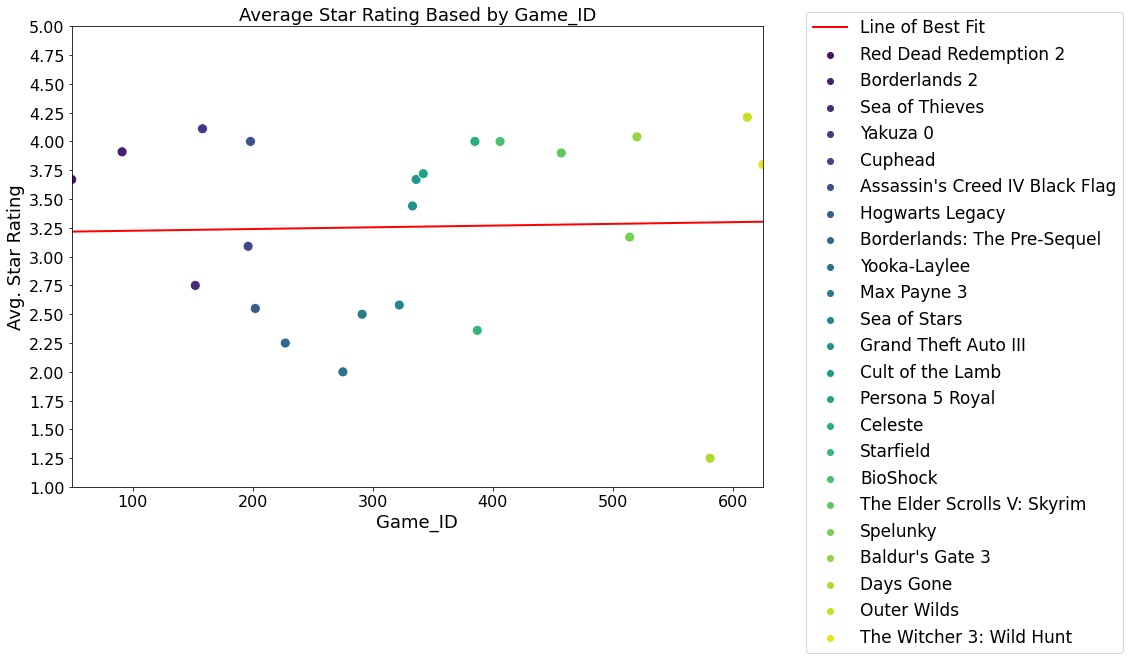

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the data from the CSV file
game_statistics = pd.read_csv('ProjectFiles/Stats_Analysis_Update.csv')

# Set up the figure with adjusted size and margins
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Create a scatter plot
sns.scatterplot(x='Game_ID', y='Avg. Star Rating', data=game_statistics, hue='Game Title', palette='viridis', s=100)

# Perform linear regression
X = game_statistics['Game_ID'].values.reshape(-1, 1)
y = game_statistics['Avg. Star Rating'].values.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plot the line of best fit
sns.regplot(x='Game_ID', y='Avg. Star Rating', data=game_statistics, scatter=False, color='red', line_kws={'linewidth': 2}, label='Line of Best Fit', ci=None)

# Set axis labels and title with font size
plt.xlabel('Game_ID', fontsize=18)
plt.ylabel('Avg. Star Rating', fontsize=18)
plt.title('Average Star Rating Based by Game_ID', fontsize=18)

# Set y-axis ticks from 1 to 5 with increments of 0.25 with font size
plt.yticks([1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5], fontsize=12)

# Set x-axis ticks with font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add a legend to the right and move it further to the right with font size
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05), fontsize=17)

# Show the plot
plt.show()




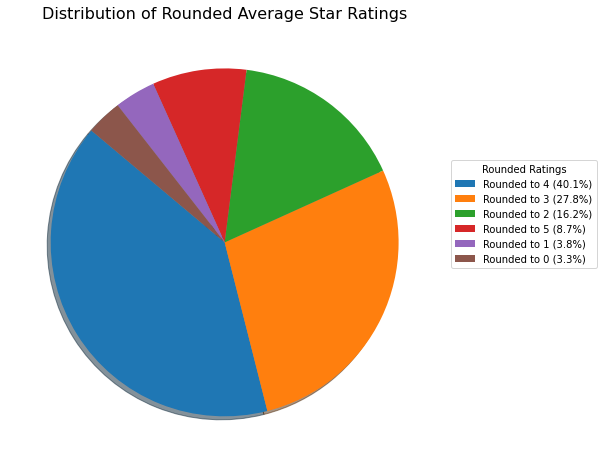

In [208]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data from the CSV file
game_statistics = pd.read_csv('ProjectFiles/Stats_Analysis_V2.csv')

# Round the 'Avg. Star Rating' to the nearest whole number
game_statistics['Rounded Avg. Star Rating'] = np.round(game_statistics['Avg. Star Rating'])

# Calculate the percentage distribution
rating_counts = game_statistics['Rounded Avg. Star Rating'].value_counts(normalize=True) * 100

# Plot a pie chart with a legend and a 3D effect
plt.figure(figsize=(8, 8))

# Remove explode and keep the rest
patches, texts, autotexts = plt.pie(rating_counts, labels=None, startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Rounded Average Star Ratings', fontsize=16)  # Adjust the fontsize as needed

# Create a custom legend with rounded ratings and percentages
legend_labels = [f'Rounded to {int(r)} ({pct:.1f}%)' for r, pct in zip(rating_counts.index, rating_counts)]
plt.legend(legend_labels, title='Rounded Ratings', bbox_to_anchor=(1.01, 0.7))

# Remove the numbers outside the pie chart
for text in texts + autotexts:
    text.set_visible(False)

# Show the plot
plt.show()





In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Read the CSV_File
trend_results2 = pd.read_csv('ProjectFiles/Results.csv')
trend_results2.loc[:, "Game Title"] = trend_results2['Title']
trend_results2.drop(columns = ['Title'], axis =1, inplace = True)

column_order = ["Game Title", "Total Hours Change(Oct-Dec)", "Change Type", "Ratio Steam(Oct)", "Ratio Steam(Dec)", "Ratio Change(Oct-Dec)", "Change Ratio"]
trend_results2 = trend_results2[column_order]


# Remove Maximum Rows
pd.set_option('display.max_rows', None)

In [210]:
trend_results2

,Game Title,Total Hours Change(Oct-Dec),Change Type,Ratio Steam(Oct),Ratio Steam(Dec),Ratio Change(Oct-Dec),Change Ratio
0,Counter-Strike 2,-158814191,Negative,328.768184,291.700538,-37.067645,Negative
1,Dota 2,-2392241,Negative,298.387915,290.386201,-8.001715,Negative
2,Apex Legends,-24247248,Negative,226.585572,216.074064,-10.511508,Negative
3,Grand Theft Auto V,9154551,Positive,291.042577,190.632656,-100.409922,Negative
4,Baldur's Gate 3,-101411420,Negative,256.483034,273.376941,16.893908,Positive
5,Team Fortress 2,-1167801,Negative,327.494414,270.611017,-56.883396,Negative
6,Path of Exile,-14260377,Negative,306.084420,75.451567,-230.632853,Negative
7,Rust,2325093,Positive,306.184132,267.679518,-38.504614,Negative
8,Cyberpunk 2077,-26616925,Negative,140.636634,232.993071,92.356437,Positive
9,War Thunder,2337717,Positive,267.719733,296.660722,28.940989,Positive


In [211]:
import pandas as pd

# Read the CSV_File
trend_results = pd.read_csv('ProjectFiles/Results.csv')

# Round values in selected columns to the nearest whole number
columns_to_round = ["Total Hours Change(Oct-Dec)", "Ratio Steam(Oct)", "Ratio Steam(Dec)", "Ratio Change(Oct-Dec)"]
trend_results[columns_to_round] = trend_results[columns_to_round].round()

# Drop rows where "Total Hours Change(Oct-Dec)" is between 0 and 1000
trend_results = trend_results[~((trend_results["Total Hours Change(Oct-Dec)"] >= 0) & (trend_results["Total Hours Change(Oct-Dec)"] <= 1000))]

# Convert "Total Hours Change(Oct-Dec)" to millions and round to one decimal place
trend_results["Total Hours Change(round by 1e6)"] = (trend_results["Total Hours Change(Oct-Dec)"] / 1e6).round(1)

# Remove rows where 'Total Hours Change(round by 1e6)' is between -0.9 and 0.9
trend_results = trend_results[
    ~((trend_results["Total Hours Change(round by 1e6)"] >= -0.9) & (trend_results["Total Hours Change(round by 1e6)"] <= 0.9))
]

# Drop the original column
trend_results = trend_results.drop("Total Hours Change(Oct-Dec)", axis=1)

# Drop rows where the rounded value is 0.0
trend_results = trend_results[trend_results["Total Hours Change(round by 1e6)"] != 0.0]

# Reorder columns to move the new column back to the original position
column_order = ["Title", "Total Hours Change(round by 1e6)", "Change Type", "Ratio Steam(Oct)", "Ratio Steam(Dec)", "Ratio Change(Oct-Dec)", "Change Ratio"]
trend_results = trend_results[column_order]

# Creates a Brand New CSV File
trend_results.to_csv('ProjectFiles/Results_Update.csv', index=False)

update_trend_results = pd.read_csv('ProjectFiles/Results_Update.csv')




In [212]:
update_trend_results

,Title,Total Hours Change(round by 1e6),Change Type,Ratio Steam(Oct),Ratio Steam(Dec),Ratio Change(Oct-Dec),Change Ratio
0,Counter-Strike 2,-158.8,Negative,329.0,292.0,-37.0,Negative
1,Dota 2,-2.4,Negative,298.0,290.0,-8.0,Negative
2,Apex Legends,-24.2,Negative,227.0,216.0,-11.0,Negative
3,Grand Theft Auto V,9.2,Positive,291.0,191.0,-100.0,Negative
4,Baldur's Gate 3,-101.4,Negative,256.0,273.0,17.0,Positive
5,Team Fortress 2,-1.2,Negative,327.0,271.0,-57.0,Negative
6,Path of Exile,-14.3,Negative,306.0,75.0,-231.0,Negative
7,Rust,2.3,Positive,306.0,268.0,-39.0,Negative
8,Cyberpunk 2077,-26.6,Negative,141.0,233.0,92.0,Positive
9,War Thunder,2.3,Positive,268.0,297.0,29.0,Positive


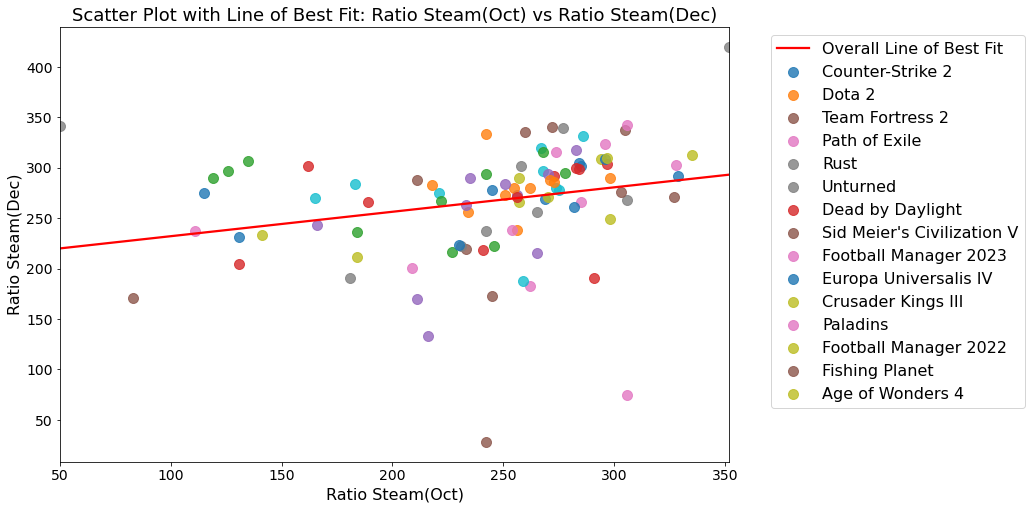

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'trend_results' is your DataFrame with all the data

# Get the top ten games based on the maximum value of 'Ratio Steam(Oct)'
top_ten_games = trend_results.nlargest(15, 'Ratio Steam(Oct)')

# Scatter plot for Ratio Steam(Oct) vs Ratio Steam(Dec) for each game with a line of best fit
plt.figure(figsize=(12, 8))

# Loop through each game in the dataset and plot scatter points
for title in trend_results['Title']:
    title_data = trend_results[trend_results['Title'] == title]
    sns.regplot(x='Ratio Steam(Oct)', y='Ratio Steam(Dec)', data=title_data, scatter_kws={'s': 100}, line_kws={'ci': None}, label=title if title in top_ten_games['Title'].values else None)

# Add a single line of best fit for all data
sns.regplot(x='Ratio Steam(Oct)', y='Ratio Steam(Dec)', data=trend_results, scatter=False, line_kws={'color': 'red'}, label='Overall Line of Best Fit', ci = None)

# Add labels
plt.xlabel('Ratio Steam(Oct)', fontsize=16)
plt.ylabel('Ratio Steam(Dec)', fontsize=16)
plt.title('Scatter Plot with Line of Best Fit: Ratio Steam(Oct) vs Ratio Steam(Dec)', fontsize=18)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Increase fontsize of x-axis and y-axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()


In [214]:
"""

Breaking the Results.csv File into two csv files to have the top highest changes
and top lowest changes in total hours changed in teh scrapped data.

"""


import pandas as pd

# Read the CSV_File
trend_results = pd.read_csv('ProjectFiles/Results.csv')

# Round values in selected columns to the nearest whole number
columns_to_round = ["Total Hours Change(Oct-Dec)", "Ratio Steam(Oct)", "Ratio Steam(Dec)", "Ratio Change(Oct-Dec)"]
trend_results[columns_to_round] = trend_results[columns_to_round].round()

# Convert "Total Hours Change(Oct-Dec)" to millions and round to one decimal place
trend_results["Total Hours Change(round by 1e4)"] = (trend_results["Total Hours Change(Oct-Dec)"] / 1e4).round(1)

# Remove rows where 'Total Hours Change(round by 1e6)' is between -0.9 and 0.9
trend_results = trend_results[
    ~((trend_results["Total Hours Change(round by 1e4)"] >= -0.9) & (trend_results["Total Hours Change(round by 1e4)"] <= 0.9))
]

# Drop the original column
trend_results = trend_results.drop("Total Hours Change(Oct-Dec)", axis=1)

# Drop rows where the rounded value is 0.0
trend_results = trend_results[trend_results["Total Hours Change(round by 1e4)"] != 0.0]

# Reorder columns to move the new column back to the original position
column_order = ["Title", "Total Hours Change(round by 1e4)", "Change Type", "Ratio Steam(Oct)", "Ratio Steam(Dec)", "Ratio Change(Oct-Dec)", "Change Ratio"]
trend_results = trend_results[column_order]

# Find the top 10 highest and lowest changes
top_10_highest = trend_results.nlargest(10, "Total Hours Change(round by 1e4)")
top_10_lowest = trend_results.nsmallest(10, "Total Hours Change(round by 1e4)")

# Creates a Brand New CSV File for the top 10 highest and lowest changes
top_10_highest.to_csv('ProjectFiles/Top_10_Highest_Changes.csv', index=False)
top_10_lowest.to_csv('ProjectFiles/Top_10_Lowest_Changes.csv', index=False)


In [215]:
import pandas as pd

# Assuming 'game_statistics' is your DataFrame with Avg. Star Rating
# and 'Results' is your DataFrame with Ratio Steam(Oct) and Ratio Steam(Dec)

# Read the CSV file with Ratio Steam data
results_data = pd.read_csv('ProjectFiles/Results.csv')  # Update the file path if needed

game_statistics_2 = pd.read_csv('ProjectFiles/Stats_Analysis_Update.csv')

# Extract columns for Ratio Steam(Oct) and Ratio Steam(Dec)
ratio_oct_data = results_data[['Title', 'Ratio Steam(Oct)']].round(1)
ratio_dec_data = results_data[['Title', 'Ratio Steam(Dec)']].round(1)

# Merge each DataFrame with 'game_statistics' based on matching 'Game Title'
merged_oct_data = pd.merge(game_statistics_2, ratio_oct_data, how='inner', left_on='Game Title', right_on='Title')
merged_dec_data = pd.merge(game_statistics_2, ratio_dec_data, how='inner', left_on='Game Title', right_on='Title')

# Drop the original column
merged_oct_data = merged_oct_data.drop("Title", axis=1)
merged_dec_data = merged_dec_data.drop("Title", axis=1)

# Save the merged data to new CSV files
merged_oct_data.to_csv('Merged_Data_Oct.csv', index=False)
merged_dec_data.to_csv('Merged_Data_Dec.csv', index=False)




In [216]:
merged_oct_data

,Game_ID,Game Title,Avg. Star Rating,Completed Status,Shelved Status,Abandoned Status,Ratio Steam(Oct)
0,49,Red Dead Redemption 2,3.67,83.33%,5.56%,11.11%,256.3
1,91,Borderlands 2,3.91,72.73%,9.09%,18.18%,237.1
2,152,Sea of Thieves,2.75,25.00%,50.00%,25.00%,163.7
3,158,Yakuza 0,4.11,83.33%,5.56%,5.56%,238.8
4,196,Cuphead,3.09,72.73%,9.09%,9.09%,264.1
5,198,Assassin's Creed IV Black Flag,4.00,66.67%,16.67%,16.67%,273.3
6,202,Hogwarts Legacy,2.55,54.55%,18.18%,27.27%,264.5
7,227,Borderlands: The Pre-Sequel,2.25,25.00%,25.00%,50.00%,264.1
8,275,Yooka-Laylee,2.00,25.00%,25.00%,25.00%,251.2
9,291,Max Payne 3,2.50,75.00%,12.50%,12.50%,279.6


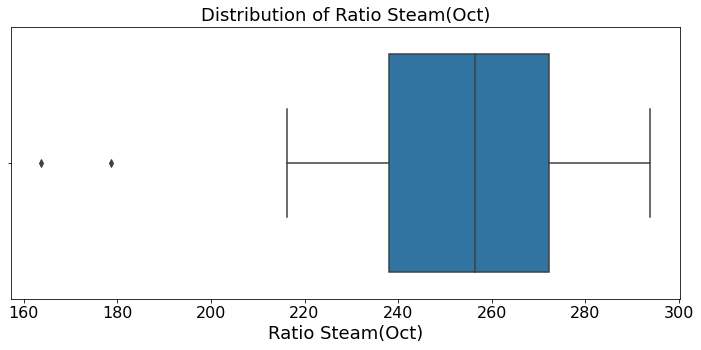

In [217]:
import seaborn as sns

# Boxplot for Ratio Steam(Oct)
plt.figure(figsize=(12, 5))
sns.boxplot(x=merged_oct_data['Ratio Steam(Oct)'])
plt.xlabel('Ratio Steam(Oct)', fontsize=18)
plt.title('Distribution of Ratio Steam(Oct)', fontsize=18)
plt.xticks(fontsize=16)
plt.show()

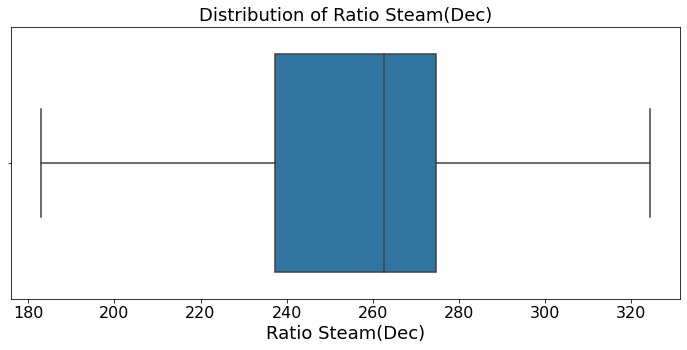

In [218]:
import seaborn as sns

# Boxplot for Ratio Steam(Oct)
plt.figure(figsize=(12, 5))
sns.boxplot(x=merged_dec_data['Ratio Steam(Dec)'])
plt.xlabel('Ratio Steam(Dec)', fontsize=18)
plt.title('Distribution of Ratio Steam(Dec)', fontsize=18)
plt.xticks(fontsize=16)
plt.show()

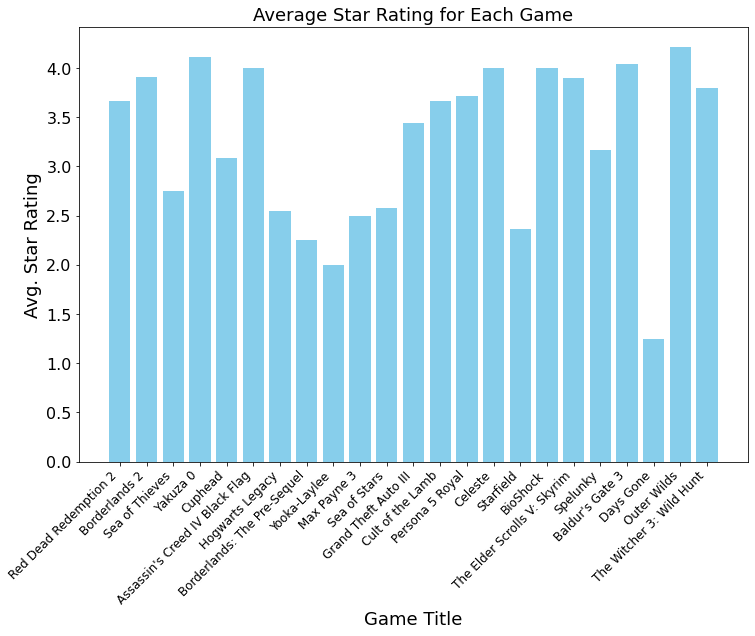

In [219]:
import matplotlib.pyplot as plt

# Bar chart for Avg. Star Rating
plt.figure(figsize=(12, 8))
plt.bar(merged_oct_data['Game Title'], merged_oct_data['Avg. Star Rating'], color='skyblue')
plt.xlabel('Game Title', fontsize=18)
plt.ylabel('Avg. Star Rating', fontsize=18)
plt.title('Average Star Rating for Each Game', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=16)
plt.show()

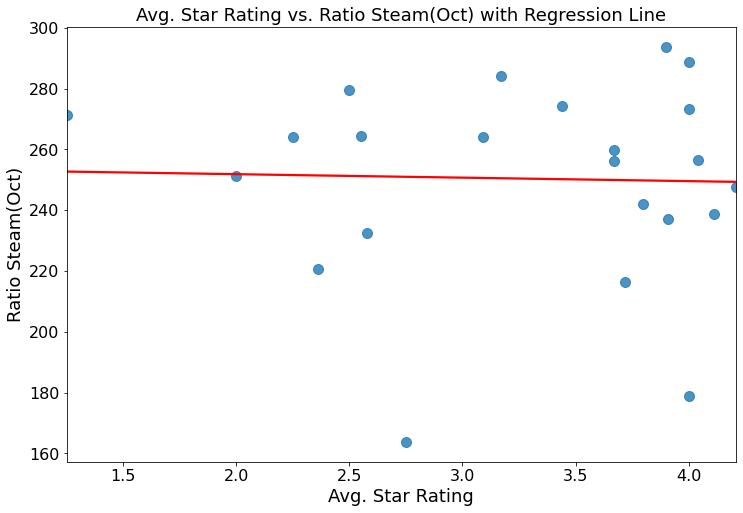

In [220]:
import seaborn as sns

# Scatter plot with regression line for Avg. Star Rating vs. Ratio Steam(Oct)
plt.figure(figsize=(12, 8))
sns.regplot(x='Avg. Star Rating', y='Ratio Steam(Oct)', data=merged_oct_data, scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('Avg. Star Rating', fontsize=18)
plt.ylabel('Ratio Steam(Oct)', fontsize=18)
plt.title('Avg. Star Rating vs. Ratio Steam(Oct) with Regression Line', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

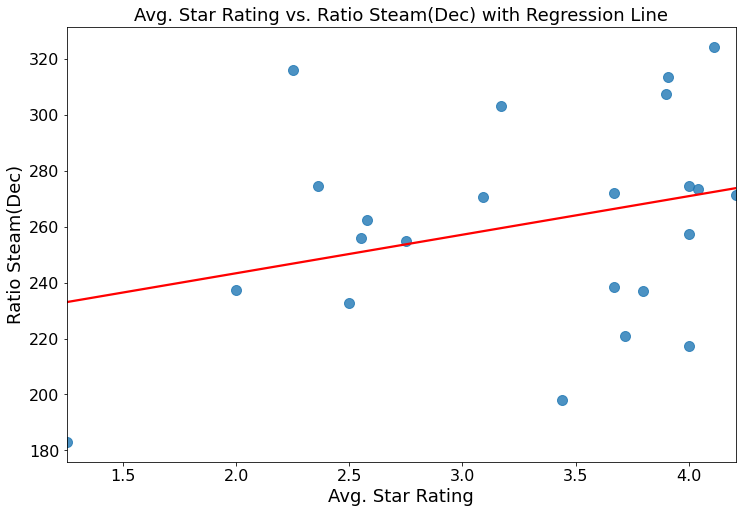

In [221]:
import seaborn as sns

# Scatter plot with regression line for Avg. Star Rating vs. Ratio Steam(Oct)
plt.figure(figsize=(12, 8))
sns.regplot(x='Avg. Star Rating', y='Ratio Steam(Dec)', data=merged_dec_data, scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('Avg. Star Rating', fontsize=18)
plt.ylabel('Ratio Steam(Dec)', fontsize=18)
plt.title('Avg. Star Rating vs. Ratio Steam(Dec) with Regression Line', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()